In [46]:
# import libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tomotopy as tp
import re

In [47]:
# import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [48]:
train.head()

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...


In [49]:
print(sum(train['helpfulness_cat'])/len(train))


0.7637377963737796


In [50]:
document_lengths = np.array(list(map(len, train['imdb_user_review'].str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 175.48888888888888.
The minimum number of words in a document is: 6.
The maximum number of words in a document is: 3954.


/opt/anaconda3/envs/newfiat/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of number of words'}, xlabel='Number of words', ylabel='Density'>

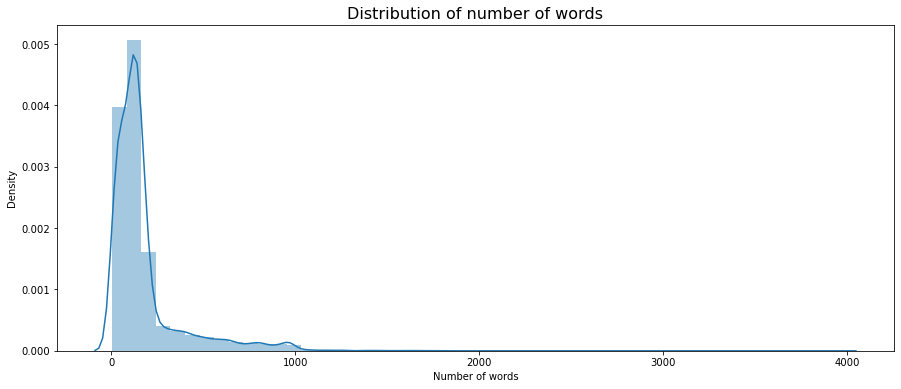

In [51]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax)

In [52]:
print("There are {} documents with over 1500 words.".format(sum(document_lengths > 1500)))
print("There are {} documents with max 6 words.".format(sum(document_lengths <= 6)))

There are 9 documents with over 1500 words.
There are 2 documents with max 6 words.


### 2. Basic Data Cleansing

In [53]:
# data sample
train['imdb_user_review'][0]

'It is hard to find such delightful and adorable movies these days as \\"The Kid\\". It is a silent movie but so rich, winning and beautiful that you don\\u00b4t nead words. Chaplin and 6-year old Coogan are possibly the most charming pair I have ever seen in my life. The film succees to be nicely light and full of joy but also overwhelmingly sad and sentimental. I always get my eyes full with tears of saddness and happiness. And I really never cry in movies. And the music...its simply Oscar-level! The movie is sympathetic, full of feeling, touchingly funny moments. It is truly a masterpiece showing how extraordinary talented person Charlie Chaplin was considering this film is respectively over 80 years old! So don\\u00b4t you miss it because of it\\u00b4s age, don\\u00b4t miss it.'

In [54]:
def basic_clean(text):
    """
    Remove \\,\n,\t,... from text
    Remove whitespace from text
    change to lowercase
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\'', ' ').replace('"',' ')
    pattern = re.compile(r'\s+')
    Formatted_text = Formatted_text.lower()
    Formatted_text = Formatted_text.replace('\\u00b4',' ').replace('\\',' ')
    Without_whitespace = re.sub(pattern, ' ', Formatted_text)
    Formatted_text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return Formatted_text

In [55]:
# cleaning data
train['imdb_user_review'] = train['imdb_user_review'].apply(basic_clean)

In [56]:
train['imdb_user_review'][0]

'it is hard to find such delightful and adorable movies these days as the kid . it is a silent movie but so rich, winning and beautiful that you don t nead words. chaplin and 6-year old coogan are possibly the most charming pair i have ever seen in my life. the film succees to be nicely light and full of joy but also overwhelmingly sad and sentimental. i always get my eyes full with tears of saddness and happiness. and i really never cry in movies. and the music...its simply oscar-level! the movie is sympathetic, full of feeling, touchingly funny moments. it is truly a masterpiece showing how extraordinary talented person charlie chaplin was considering this film is respectively over 80 years old! so don t you miss it because of it s age, don t miss it.'

### 2.1 Sentiment Analysis

In [ ]:
# install transformers
#!pip install -q transformers

In [ ]:
# # using fine tuned bertmodel based on tweet dataset to analyse sentiment
# from transformers import pipeline
 
# # Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
# # update sentiment analysis model config
# sentiment_analysis.model.config.update({"max_position_embeddings":1000,"max_seq_length":512})

In [ ]:
# from transformers import pipeline
 
# # Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
 
# # Let's run the sentiment analysis on each tweet
# sentiment = []
# for review in train['imdb_user_review']:
#    try:
#      content = [review]
#      sentiment = sentiment_analysis(content)
#      review.append({'tweet': content, 'sentiment': sentiment[0]['label']})
 
#    except:
#      pass

In [ ]:
'''
index error: 
Token indices sequence length is longer than the specified maximum sequence length for this model (176 > 128)
Due to the length of reviews, the model cannot handle them.
'''

In [ ]:
# using roberta-large-mnli model to analyse sentiment
from transformers import pipeline
pipe = pipeline(model="roberta-large-mnli",return_all_scores=True)

Downloading:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
CONTRADICTION = []
NEUTRAL = []
ENTAILMENT = []

for review in train['imdb_user_review']:
   try:
    temp = 0
    temp = pipe(review)[0][0]['score']
    CONTRADICTION.append(temp)

    temp = pipe(review)[0][1]['score']
    NEUTRAL.append(temp)

    temp = pipe(review)[0][2]['score']
    ENTAILMENT.append(temp)
   except:
     temp = 0
     CONTRADICTION.append(temp)
     NEUTRAL.append(temp)
     ENTAILMENT.append(temp)

In [ ]:
# combine contradiction, neutral and entailment into a data frame
train_sentiment = pd.DataFrame({'CONTRADICTION': CONTRADICTION, 'NEUTRAL': NEUTRAL, 'ENTAILMENT': ENTAILMENT})
train_sentiment.to_csv('train_sentiment.csv', index=False)

In [ ]:
# load the sentiment dataframe
train_sentiment = pd.read_csv('train_sentiment.csv')

In [ ]:
# combine healpfulness and sentiment into a data frame
train_sentiment['helpfulness_cat'] = train['helpfulness_cat']

In [ ]:
train_sentiment.head()

,CONTRADICTION,NEUTRAL,ENTAILMENT,helpfulness_cat
0,0.301088,0.670759,0.028153,1.0
1,0.031557,0.959142,0.009301,1.0
2,0.000880,0.994948,0.004172,1.0
3,0.441404,0.545666,0.012929,1.0
4,0.083177,0.886534,0.030290,1.0


In [ ]:
# get the avg score for reviews
print("The average contradiction score for unhelpful reviews is: {}.".format(np.mean(train_sentiment['CONTRADICTION'][train_sentiment['helpfulness_cat'] == 0])))
print("The average contradiction score for helpful reviews is: {}.".format(np.mean(train_sentiment['CONTRADICTION'][train_sentiment['helpfulness_cat'] == 1])))
print("The average neutral score for unhelpful reviews is: {}.".format(np.mean(train_sentiment['NEUTRAL'][train_sentiment['helpfulness_cat'] == 0])))
print("The average neutral score for helpful reviews is: {}.".format(np.mean(train_sentiment['NEUTRAL'][train_sentiment['helpfulness_cat'] == 1])))
print("The average entailment score for unhelpful reviews is: {}.".format(np.mean(train_sentiment['ENTAILMENT'][train_sentiment['helpfulness_cat'] == 0])))
print("The average entailment score for helpful reviews is: {}.".format(np.mean(train_sentiment['ENTAILMENT'][train_sentiment['helpfulness_cat'] == 1])))


The average contradiction score for unhelpful reviews is: 0.12952283451497476.
The average contradiction score for helpful reviews is: 0.10519036463656863.
The average neutral score for unhelpful reviews is: 0.7467805991370402.
The average neutral score for helpful reviews is: 0.7229228923420817.
The average entailment score for unhelpful reviews is: 0.07568397245021018.
The average entailment score for helpful reviews is: 0.054647882621228404.


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'Sentiment score')

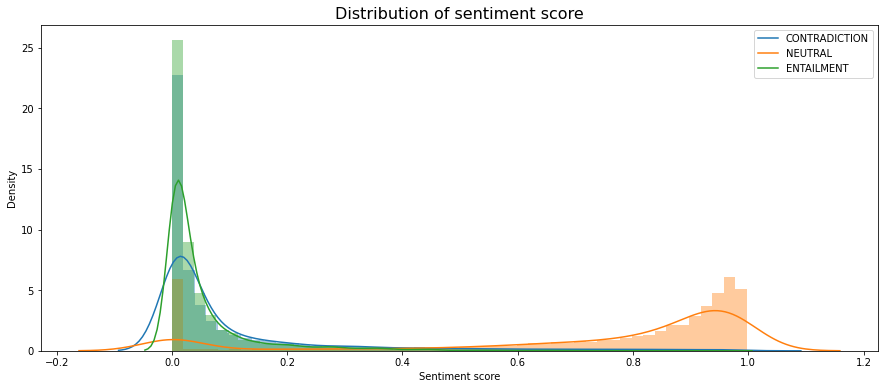

In [ ]:
# plot the distribution for each sentiment score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of sentiment score", fontsize=16)
sns.distplot(train_sentiment['CONTRADICTION'][train_sentiment['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train_sentiment['NEUTRAL'][train_sentiment['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train_sentiment['ENTAILMENT'][train_sentiment['helpfulness_cat'] == 1], bins=50, ax=ax)
# plot legend
ax.legend(['CONTRADICTION', 'NEUTRAL', 'ENTAILMENT'])
ax.set_xlabel("Sentiment score")


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'Sentiment score')

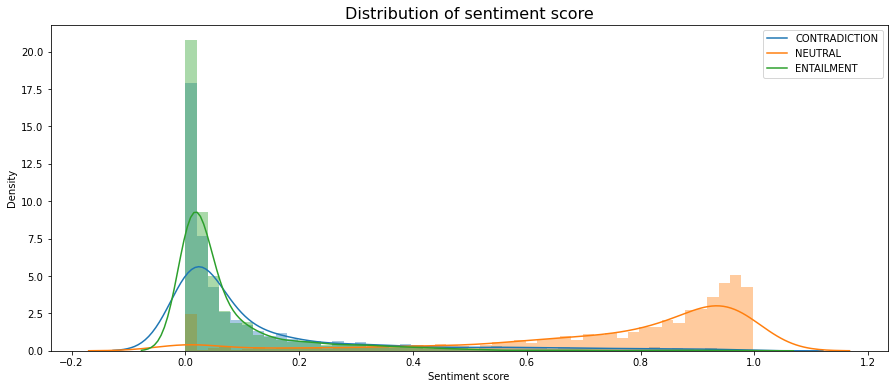

In [ ]:
# plot the distribution for each sentiment score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of sentiment score", fontsize=16)
sns.distplot(train_sentiment['CONTRADICTION'][train_sentiment['helpfulness_cat'] == 0], bins=50, ax=ax)
sns.distplot(train_sentiment['NEUTRAL'][train_sentiment['helpfulness_cat'] == 0], bins=50, ax=ax)
sns.distplot(train_sentiment['ENTAILMENT'][train_sentiment['helpfulness_cat'] == 0], bins=50, ax=ax)
# plot legend
ax.legend(['CONTRADICTION', 'NEUTRAL', 'ENTAILMENT'])
ax.set_xlabel("Sentiment score")

In [ ]:
# using nltk vader to carry out sentiment analysis
import nltk
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# create a function to calculate the sentiment score
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_score(text):
    score = sent_analyzer.polarity_scores(text)
    score.pop('compound')
    return score

In [ ]:
# calculate the sentiment score for each review and create neg, neu and pos columns
train['neg'] = train['imdb_user_review'].apply(sentiment_score).apply(lambda x: x['neg'])
train['neu'] = train['imdb_user_review'].apply(sentiment_score).apply(lambda x: x['neu'])
train['pos'] = train['imdb_user_review'].apply(sentiment_score).apply(lambda x: x['pos'])
train.head()


,helpfulness_cat,imdb_user_review,neg,neu,pos
0,1.0,it is hard to find such delightful and adorabl...,0.072,0.540,0.387
1,1.0,"they don t make films like this faded, hauntin...",0.081,0.854,0.065
2,1.0,i first viewed this movie in 1924 at age 6 yrs...,0.045,0.749,0.206
3,1.0,i doubt that i d ever seen anything resembling...,0.116,0.748,0.135
4,1.0,i was shocked to find myself riveted to this m...,0.058,0.797,0.145


In [ ]:
# export the sentiment score to csv
train.to_csv('train_pos_neg_sentiment_score.csv', index=False)

In [ ]:
# get the avg score for reviews
print("The average negative score for unhelpful reviews is: {}.".format(np.mean(train['neg'][train['helpfulness_cat'] == 0])))
print("The average negative score for helpful reviews is: {}.".format(np.mean(train['neg'][train['helpfulness_cat'] == 1])))
print("The average neutral score for unhelpful reviews is: {}.".format(np.mean(train['neu'][train['helpfulness_cat'] == 0])))
print("The average neutral score for helpful reviews is: {}.".format(np.mean(train['neu'][train['helpfulness_cat'] == 1])))
print("The average positive score for unhelpful reviews is: {}.".format(np.mean(train['pos'][train['helpfulness_cat'] == 0])))
print("The average positive score for helpful reviews is: {}.".format(np.mean(train['pos'][train['helpfulness_cat'] == 1])))


The average negative score for unhelpful reviews is: 0.11789925226288862.
The average negative score for helpful reviews is: 0.09155953250547828.
The average neutral score for unhelpful reviews is: 0.7268256591892942.
The average neutral score for helpful reviews is: 0.7353839785731674.
The average positive score for unhelpful reviews is: 0.15527902400629673.
The average positive score for helpful reviews is: 0.17305028000973946.


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'Sentiment score')

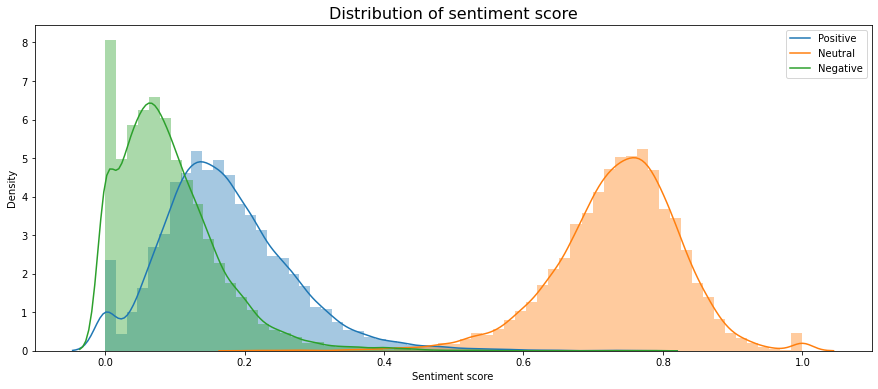

In [ ]:
# plot the distribution for each sentiment score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of sentiment score", fontsize=16)
sns.distplot(train['pos'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train['neu'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train['neg'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
# plot legend
ax.legend(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel("Sentiment score")


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'Sentiment score')

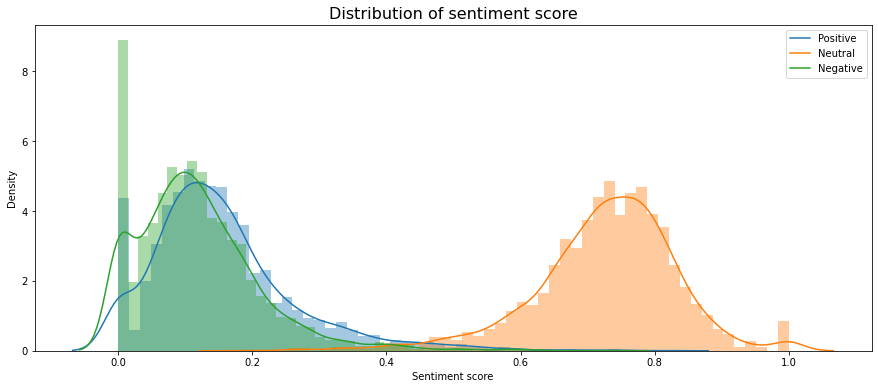

In [ ]:
# plot the distribution for each sentiment score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of sentiment score", fontsize=16)
sns.distplot(train['pos'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
sns.distplot(train['neu'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
sns.distplot(train['neg'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
# plot legend
ax.legend(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel("Sentiment score")

In [ ]:
# get subjectivity score for each review
from textblob import TextBlob
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

train['subjective_score'] = train['imdb_user_review'].apply(getSubjectivity)
train.head()

,helpfulness_cat,imdb_user_review,subjective_score
0,1.0,it is hard to find such delightful and adorabl...,0.637457
1,1.0,"they don t make films like this faded, hauntin...",0.376882
2,1.0,i first viewed this movie in 1924 at age 6 yrs...,0.601871
3,1.0,i doubt that i d ever seen anything resembling...,0.588847
4,1.0,i was shocked to find myself riveted to this m...,0.409792


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Subjectivity score')

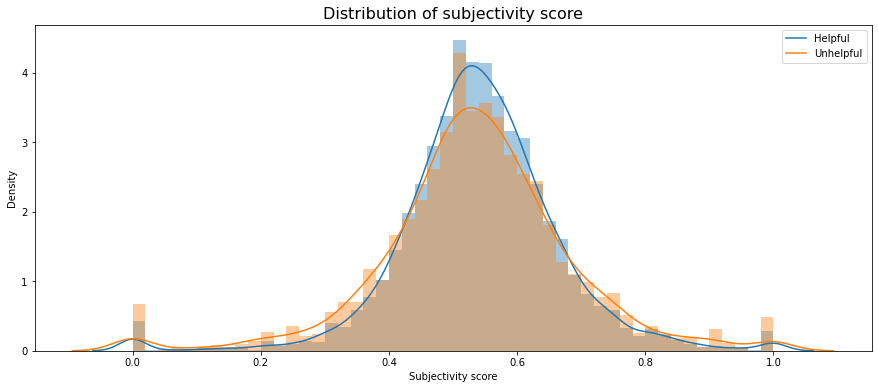

In [ ]:
# plot the distribution for subjectivity score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of subjectivity score", fontsize=16)
sns.distplot(train['subjective_score'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train['subjective_score'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
# plot legend
ax.legend(['Helpful', 'Unhelpful'])
ax.set_xlabel("Subjectivity score")

In [ ]:
# get the avg score for reviews
print("The average subjectivity score for unhelpful reviews is: {}.".format(np.mean(train['subjective_score'][train['helpfulness_cat'] == 0])))
print("The average subjectivity score for helpful reviews is: {}.".format(np.mean(train['subjective_score'][train['helpfulness_cat'] == 1])))


The average subjectivity score for unhelpful reviews is: 0.5352883013500236.
The average subjectivity score for helpful reviews is: 0.5410528095834198.


## 3. Building model

### tensorflow BERT

In [ ]:
#!pip install nlpaug

In [21]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import matplotlib.pyplot as plt
import nlpaug.augmenter.word as naw
from tqdm import tqdm
from nlpaug.util import Action
import gzip
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#### Augmentation approach

In [ ]:
Train_df, Valid_df = train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
# nlp data augmentation
# check the percentage of each label in the data set
Train_df.groupby('helpfulness_cat').count()/len(train)

,imdb_user_review
helpfulness_cat,
0.0,0.189679
1.0,0.610321


In [ ]:
Train_df.groupby('helpfulness_cat').count()

,imdb_user_review
helpfulness_cat,
0.0,2040
1.0,6564


In [68]:
#!pip install wget
# download model from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
# import wget
# url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
# filename = wget.download(url)
# gzip -d GoogleNews-vectors-negative300.bin.gz
# get current path
import os
current_path = os.getcwd()
# load the google model path
google_model_path = os.path.join(current_path, 'GoogleNews-vectors-negative300.bin')

In [69]:
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=google_model_path,
    action="insert")

In [70]:
# augmente the unhelpful reviews
unhelpful_reviews = Train_df[Train_df['helpfulness_cat'] == 0].reset_index(drop=True)

def augment_text(df_train,df_unhelpful,num,pr=0.2):
    aug.aug_p=pr
    new_text=[]

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_unhelpful),num)):
            text = unhelpful_reviews.iloc[i]['imdb_user_review']
            augmented_text = aug.augment(text)
            new_text.append(augmented_text)
    
    
    ## dataframe
    new=pd.DataFrame({'imdb_user_review':new_text,'helpfulness_cat':0})
    new['imdb_user_review'] = new['imdb_user_review'].apply(lambda x: ' '.join(x))
    df_new=shuffle(df_train.append(new).reset_index(drop=True))
    return df_new
   

In [ ]:
Train_df = augment_text(Train_df,unhelpful_reviews,4524)

100%|██████████| 4524/4524 [00:03<00:00, 1148.91it/s]
/tmp/ipykernel_18306/1635099116.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=shuffle(df_train.append(new).reset_index(drop=True))


In [ ]:
Train_df.head()

,helpfulness_cat,imdb_user_review
12261,0.0,"boring movie, the acting Sadrist is fine but t..."
3356,1.0,"my title says it up pretty well, the acting is..."
11011,0.0,worst movie i ve seen in ages. high school kid...
3531,1.0,as a former submarine sailor i watch every sub...
12114,0.0,i could not believe i spent over 2 hours watch...


In [ ]:
# check the percentage of each label in the data set
Train_df.groupby('helpfulness_cat').count()/len(Train_df)

,imdb_user_review
helpfulness_cat,
0.0,0.5
1.0,0.5


In [ ]:
X_train = Train_df.drop(['helpfulness_cat'], axis=1)
y_train = Train_df.loc[:, 'helpfulness_cat']
X_valid = Valid_df.drop(['helpfulness_cat'], axis=1)
y_valid = Valid_df.loc[:, 'helpfulness_cat']

In [7]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

2022-07-15 15:15:32.809082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-15 15:15:32.809106: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-15 15:15:32.809118: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ashubuntu): /proc/driver/nvidia/version does not exist
2022-07-15 15:15:32.809257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-15 15:15:37.026993: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62509056 exceeds 

In [32]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess_model(text_input)
outputs = bert_model(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=5, batch_size = 32,validation_data=(X_valid, y_valid))

Epoch 1/5


2022-07-15 13:49:26.085316: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 16777216 exceeds 10% of free system memory.
2022-07-15 13:49:26.098278: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 16777216 exceeds 10% of free system memory.
2022-07-15 13:49:26.132254: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2022-07-15 13:49:26.155356: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.


411/411 [==============================] - 271s 654ms/step - loss: 0.5975 - accuracy: 0.6807 - val_loss: 0.5799 - val_accuracy: 0.6894
Epoch 2/5
411/411 [==============================] - 264s 642ms/step - loss: 0.5442 - accuracy: 0.7259 - val_loss: 0.5584 - val_accuracy: 0.7108
Epoch 3/5
411/411 [==============================] - 264s 644ms/step - loss: 0.5276 - accuracy: 0.7406 - val_loss: 0.6165 - val_accuracy: 0.6620
Epoch 4/5
411/411 [==============================] - 261s 636ms/step - loss: 0.5207 - accuracy: 0.7447 - val_loss: 0.6002 - val_accuracy: 0.6746
Epoch 5/5
411/411 [==============================] - 262s 638ms/step - loss: 0.5155 - accuracy: 0.7474 - val_loss: 0.5975 - val_accuracy: 0.6722


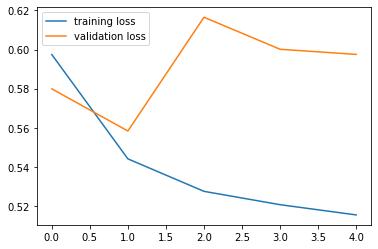

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

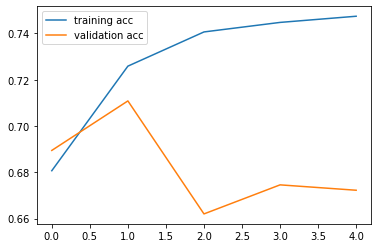

In [ ]:
plt.plot(log.history['accuracy'],label = "training acc")
plt.plot(log.history['val_accuracy'], label = "validation acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# predict on test data
y_pred = model.predict(X_valid)
# get F1 score
print(classification_report(y_valid, y_pred.round()))

68/68 [==============================] - 37s 538ms/step
              precision    recall  f1-score   support

         0.0       0.33      0.41      0.37       501
         1.0       0.81      0.75      0.78      1650

    accuracy                           0.67      2151
   macro avg       0.57      0.58      0.57      2151
weighted avg       0.70      0.67      0.68      2151



In [ ]:
# get the f-1 score
from sklearn.metrics import f1_score
f1_score = f1_score(y_valid, y_pred.round())

In [ ]:
f1_score

0.7786499215070645

#### extract same amount of data

In [10]:
# create a new balanced dataset
unhelpful = train.loc[train["helpfulness_cat"] == 0, ["imdb_user_review", "helpfulness_cat"]]
helpful = train.loc[train["helpfulness_cat"] == 1, ["imdb_user_review", "helpfulness_cat"]]
helpful = helpful.sample(n=len(unhelpful), random_state=42)
s = pd.concat([unhelpful, helpful]) # create a more balanced training set for training the model

# split the trainaing data into train and test
from sklearn.model_selection import train_test_split
X_train = s.drop(["helpfulness_cat"], axis=1)
y_train = s["helpfulness_cat"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                    y_train, 
                                                    random_state=123,
                                                    test_size=0.2)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=5, batch_size = 32,validation_data=(X_valid, y_valid))

Epoch 1/5


2022-07-15 15:16:07.083974: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2022-07-15 15:16:07.105435: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2022-07-15 15:16:07.233169: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2022-07-15 15:16:07.313770: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.


112/112 [==============================] - 94s 820ms/step - loss: 0.7031 - accuracy: 0.5381 - val_loss: 0.6784 - val_accuracy: 0.5757
Epoch 2/5
112/112 [==============================] - 89s 794ms/step - loss: 0.6676 - accuracy: 0.5884 - val_loss: 0.6588 - val_accuracy: 0.6059
Epoch 3/5
112/112 [==============================] - 86s 769ms/step - loss: 0.6536 - accuracy: 0.6151 - val_loss: 0.6633 - val_accuracy: 0.5987
Epoch 4/5
112/112 [==============================] - 87s 778ms/step - loss: 0.6457 - accuracy: 0.6269 - val_loss: 0.6487 - val_accuracy: 0.6184
Epoch 5/5
112/112 [==============================] - 87s 777ms/step - loss: 0.6489 - accuracy: 0.6342 - val_loss: 0.6476 - val_accuracy: 0.6302


In [12]:
from sklearn.metrics import classification_report
# predict on test data
y_pred = model.predict(X_valid)
# get F1 score
print(classification_report(y_valid, y_pred.round()))

48/48 [==============================] - 27s 552ms/step
              precision    recall  f1-score   support

         0.0       0.60      0.72      0.66       752
         1.0       0.67      0.54      0.60       773

    accuracy                           0.63      1525
   macro avg       0.64      0.63      0.63      1525
weighted avg       0.64      0.63      0.63      1525



In [29]:
Train_df, Valid_df = train_test_split(train, test_size=0.2, random_state=42)

In [30]:
# create a new balanced dataset
unhelpful = Train_df.loc[Train_df["helpfulness_cat"] == 0, ["imdb_user_review", "helpfulness_cat"]]
helpful = Train_df.loc[Train_df["helpfulness_cat"] == 1, ["imdb_user_review", "helpfulness_cat"]]
helpful = helpful.sample(n=len(unhelpful), random_state=42)
s = pd.concat([unhelpful, helpful]) # create a more balanced training set for training the model

# split the trainaing data into train and test
from sklearn.model_selection import train_test_split
X_train = s.drop(["helpfulness_cat"], axis=1)
y_train = s["helpfulness_cat"]
X_valid = Valid_df.drop(['helpfulness_cat'], axis=1)
y_valid = Valid_df.loc[:, 'helpfulness_cat']

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=5, batch_size = 32,validation_data=(X_valid, y_valid))

Epoch 1/5
128/128 [==============================] - 108s 843ms/step - loss: 0.7038 - accuracy: 0.5556 - val_loss: 0.6959 - val_accuracy: 0.5481
Epoch 2/5
128/128 [==============================] - 109s 851ms/step - loss: 0.6680 - accuracy: 0.5914 - val_loss: 0.7218 - val_accuracy: 0.5193
Epoch 3/5
128/128 [==============================] - 108s 843ms/step - loss: 0.6613 - accuracy: 0.6025 - val_loss: 0.6593 - val_accuracy: 0.6179
Epoch 4/5
128/128 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6199

#### original data result

In [18]:
# split the trainaing data into train and test
from sklearn.model_selection import train_test_split
X_train = train.drop(["helpfulness_cat"], axis=1)
y_train = train["helpfulness_cat"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=123)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=5, batch_size = 32,validation_data=(X_valid, y_valid))

Epoch 1/5
269/269 [==============================] - 185s 686ms/step - loss: 0.5214 - accuracy: 0.7564 - val_loss: 0.5101 - val_accuracy: 0.7638
Epoch 2/5
269/269 [==============================] - 183s 682ms/step - loss: 0.5161 - accuracy: 0.7588 - val_loss: 0.5076 - val_accuracy: 0.7629
Epoch 3/5
269/269 [==============================] - 186s 691ms/step - loss: 0.5140 - accuracy: 0.7622 - val_loss: 0.5118 - val_accuracy: 0.7624
Epoch 4/5
269/269 [==============================] - 185s 687ms/step - loss: 0.5110 - accuracy: 0.7621 - val_loss: 0.5090 - val_accuracy: 0.7610
Epoch 5/5
269/269 [==============================] - 185s 688ms/step - loss: 0.5064 - accuracy: 0.7635 - val_loss: 0.5053 - val_accuracy: 0.7620


In [20]:
# predict on test data
y_pred = model.predict(X_valid)
# get F1 score
print(classification_report(y_valid, y_pred.round()))

68/68 [==============================] - 38s 544ms/step
              precision    recall  f1-score   support

         0.0       0.46      0.08      0.13       506
         1.0       0.77      0.97      0.86      1645

    accuracy                           0.76      2151
   macro avg       0.62      0.52      0.50      2151
weighted avg       0.70      0.76      0.69      2151



### Doc2Vec

In [ ]:
def basic_clean(text):
    """
    Remove \\,\n,\t,... from text
    Remove whitespace from text
    change to lowercase
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\'', '').replace('"',' ')
    pattern = re.compile(r'\s+')
    Formatted_text = Formatted_text.lower()
    Formatted_text = Formatted_text.replace(r'u00b4','') 
    Formatted_text = Formatted_text.replace(r'u0085', '')
    Formatted_text = Formatted_text.replace('\\',' ')
    Without_whitespace = re.sub(pattern, ' ', Formatted_text)
    Formatted_text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    without_digit = re.sub(r'[^A-Za-z0-9]+'," ", Formatted_text)
    final_text = ''.join([i for i in without_digit if not i.isdigit()])
    return final_text

In [ ]:
train['imdb_user_review'] = train['imdb_user_review'].apply(basic_clean)

In [ ]:
# create a new balanced dataset
unhelpful = train.loc[train["helpfulness_cat"] == 0, ["imdb_user_review", "helpfulness_cat"]]
helpful = train.loc[train["helpfulness_cat"] == 1, ["imdb_user_review", "helpfulness_cat"]]
helpful = helpful.sample(n=len(unhelpful), random_state=42)
s = pd.concat([unhelpful, helpful]) # create a more balanced training set for training the model

In [ ]:
#import Doc2vec libraries
from nltk.tokenize import wordpunct_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
# split the trainaing data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s['imdb_user_review'], 
                                                    s.helpfulness_cat, 
                                                    random_state=123,
                                                    test_size=0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3557,)
(3557,)
(1525,)
(1525,)


In [ ]:
#tokenize the quotes for training dataset
tkn_quotes_train = [wordpunct_tokenize(quote.lower()) for quote in x_train.to_list()] 
tgd_quotes_train = [TaggedDocument(d, [i]) for i, d in enumerate(tkn_quotes_train)]

In [ ]:
#tokenize the quotes for testing dataset
tkn_quotes_test= [wordpunct_tokenize(quote.lower()) for quote in x_test.to_list()] 
tgd_quotes_test = [TaggedDocument(d, [i]) for i, d in enumerate(tkn_quotes_test)]

In [ ]:
#tokenize the quotes for training dataset
tkn_quotes = [wordpunct_tokenize(quote.lower()) for quote in s['imdb_user_review'].to_list()] 
tgd_quotes= [TaggedDocument(d, [i]) for i, d in enumerate(tkn_quotes)]

In [ ]:
# build doc2vec model with DBOW approach - using the whole dataset to train the model
model_d2v = Doc2Vec(
    tgd_quotes, vector_size=300, 
    window=2, min_count=1, workers=4, 
    epochs=100,negative=5
    )

In [ ]:
# accessing the doc2vec model
#vectorise the training and testing dataset separately
quote_vectors_train  = [model_d2v.infer_vector(tgd_quotes_train[i].words) 
                        for i in range(len(tgd_quotes_train))]

quote_vectors_test  = [model_d2v.infer_vector(tgd_quotes_test[i].words) 
                        for i in range(len(tgd_quotes_test))]

In [ ]:
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(quote_vectors_train, y_train)

LogisticRegression()

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(logreg.score(quote_vectors_test, y_test))
y_pred = logreg.predict(quote_vectors_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6255737704918033
Testing accuracy 0.6255737704918033
              precision    recall  f1-score   support

         0.0       0.61      0.69      0.64       752
         1.0       0.65      0.56      0.60       773

    accuracy                           0.63      1525
   macro avg       0.63      0.63      0.62      1525
weighted avg       0.63      0.63      0.62      1525



In [ ]:
# naive bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#scale the train data to get rid of negative values before fitting the naive bayes model
scaler = MinMaxScaler()
scaled_vectors_train = scaler.fit_transform(quote_vectors_train)

# fit naive bayes model
mnb = MultinomialNB()
mnb.fit(scaled_vectors_train, y_train)

MultinomialNB()

In [ ]:
#scale the test data
scaled_vectors_test = scaler.fit_transform(quote_vectors_test)

# naive bayes model evaluation - accuracy and F1 score
print(mnb.score(scaled_vectors_test, y_test))
y_pred = mnb.predict(scaled_vectors_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6622950819672131
Testing accuracy 0.6622950819672131
              precision    recall  f1-score   support

         0.0       0.62      0.83      0.71       752
         1.0       0.75      0.50      0.60       773

    accuracy                           0.66      1525
   macro avg       0.68      0.66      0.65      1525
weighted avg       0.69      0.66      0.65      1525



In [ ]:
# Doc2Vec with distributed memory approach - use the whole dataset to fit the model
model_dm = Doc2Vec(
    tgd_quotes, dm = 1, dm_mean = 1,
    vector_size=300, window=2, min_count=1, 
    workers=4, epochs=100,negative=5
    )

In [ ]:
#vectorise the train and test dataset
dm_vectors_train  = [model_dm.infer_vector(tgd_quotes_train[i].words) 
                        for i in range(len(tgd_quotes_train))]

dm_vectors_test  = [model_dm.infer_vector(tgd_quotes_test[i].words) 
                        for i in range(len(tgd_quotes_test))]

In [ ]:
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(dm_vectors_train, y_train)

LogisticRegression()

In [ ]:
# model evaluation
print(logreg.score(dm_vectors_test, y_test))
y_pred = logreg.predict(dm_vectors_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6321311475409837
Testing accuracy 0.6321311475409837
              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65       752
         1.0       0.66      0.56      0.61       773

    accuracy                           0.63      1525
   macro avg       0.64      0.63      0.63      1525
weighted avg       0.64      0.63      0.63      1525



In [ ]:
#naive bayes model

#scale the data to get rid of negative values
scaler = MinMaxScaler()
scaled_dm_train = scaler.fit_transform(dm_vectors_train)

# fit naive bayes model
mnb = MultinomialNB()
mnb.fit(scaled_dm_train, y_train)

MultinomialNB()

In [ ]:
#scale the test data
scaled_dm_test = scaler.fit_transform(dm_vectors_test)

# naive bayes model evaluation - accuracy and F1 score
print(mnb.score(scaled_dm_test, y_test))
y_pred = mnb.predict(scaled_dm_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.659016393442623
Testing accuracy 0.659016393442623
              precision    recall  f1-score   support

         0.0       0.66      0.63      0.65       752
         1.0       0.66      0.69      0.67       773

    accuracy                           0.66      1525
   macro avg       0.66      0.66      0.66      1525
weighted avg       0.66      0.66      0.66      1525



### BoW vectorization and LSTM by Pytorch

In [220]:

def basic_clean(text):
    """
    Remove \\,\n,\t,... from text
    Remove whitespace from text
    change to lowercase
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\'', ' ').replace('"',' ')
    pattern = re.compile(r'\s+')
    Formatted_text = Formatted_text.lower()
    Formatted_text = Formatted_text.replace('\\u00b4',' ').replace('\\',' ')
    Without_whitespace = re.sub(pattern, ' ', Formatted_text)
    Formatted_text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return Formatted_text

In [221]:
# cleaning data
train['imdb_user_review'] = train['imdb_user_review'].apply(basic_clean)

In [222]:
from sklearn.utils import shuffle
import os
import nlpaug.augmenter.word as naw
import wget
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yilingng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [223]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [224]:
train_bow = train.copy()
train_bow.head()

,helpfulness_cat,imdb_user_review
0,1.0,it is hard to find such delightful and adorabl...
1,1.0,"they don t make films like this faded, hauntin..."
2,1.0,i first viewed this movie in 1924 at age 6 yrs...
3,1.0,i doubt that i d ever seen anything resembling...
4,1.0,i was shocked to find myself riveted to this m...


In [225]:
## Further data cleaning for BoW
# step 1: remove stop words 
stop = stopwords.words('english')
train_bow["imdb_user_review"] = list(map(lambda x: ' '.join([word for word in x.split() if word not in stop]),train_bow["imdb_user_review"]))

# step 2: lemmatize the words
lemmatizer = WordNetLemmatizer()
# see = lemmatizer.lemmatize(comments)
train_bow["imdb_user_review"] = list(map(lambda x: ' '.join([lemmatizer.lemmatize(word, pos="v") for word in x.split()]),train_bow["imdb_user_review"]))

In [226]:
# create a new balanced dataset
unhelpful = train_bow.loc[train["helpfulness_cat"] == 0, ["imdb_user_review", "helpfulness_cat"]]
helpful = train_bow.loc[train_bow["helpfulness_cat"] == 1, ["imdb_user_review", "helpfulness_cat"]]
helpful = helpful.sample(n=len(unhelpful), random_state=42)
s = pd.concat([unhelpful, helpful]) # create a more balanced training set for training the model

In [227]:
# split Train.csv to train_df and valid_df
Train_df, Valid_df = train_test_split(train_bow, test_size=0.2, random_state=42)

In [228]:
# nlp data augmentation
# check the percentage of each label in the data set
Train_df.groupby('helpfulness_cat').count()/len(train)

,imdb_user_review
helpfulness_cat,
0.0,0.189679
1.0,0.610321


In [229]:
# augment the unhelpful data
Train_df = augment_text(Train_df,unhelpful_reviews,4524)

100%|██████████| 4524/4524 [00:03<00:00, 1493.30it/s]
/var/folders/yr/s6gbqy0s2kd5cn1_s40p4b2w0000gn/T/ipykernel_14183/1635099116.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=shuffle(df_train.append(new).reset_index(drop=True))


In [230]:
# Train_df has equal helpful/unhelpful
Train_df.groupby('helpfulness_cat').count()

,imdb_user_review
helpfulness_cat,
0.0,6564
1.0,6564


In [231]:
# split the training_df into train and test
X_train_bow = Train_df.drop(['helpfulness_cat'], axis=1)
y_train_bow = Train_df.loc[:, 'helpfulness_cat']
X_test_bow = Valid_df.drop(['helpfulness_cat'], axis=1)
y_test_bow = Valid_df.loc[:, 'helpfulness_cat']

In [232]:
# initialise a pipeline
nlp = spacy.load("en_core_web_lg")

# Disabling components in the nlp pipeline to speed up pre-processing
nlp.disable_pipes('tagger','attribute_ruler')
print('Pipeline after:', nlp.pipeline)

Pipeline after: [('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7fad2b512580>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7fabd1d9d820>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7fab52b88880>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7faba0b10200>)]


In [233]:
# Step 1: Tokenize the words in each moview review
docs_tokens_train, docs_tokens_test = [], []
# train set
for item in X_train_bow["imdb_user_review"]:
    tmp_tokens = [
        token.lemma_
        for token in nlp(item)
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    docs_tokens_train.append(tmp_tokens)
    del tmp_tokens

# test set
for item in X_test_bow["imdb_user_review"]:
    tmp_tokens = [
        token.lemma_
        for token in nlp(item)
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    docs_tokens_test.append(tmp_tokens)
    del tmp_tokens

/opt/anaconda3/envs/newfiat/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [234]:
# Step 2: building a dictionary collection where the keys are tokenized words 
# the larger the number, the lower the word frequency 
# The dictionary key-value pairs are also written to a text file named vocab_file.txt 
# so they can be used later by an NLP system.
def make_vocab(document_tokens,output_file):
    word_freq_dict = {}   # key = word, value = frequency

    for i in range(len(document_tokens)):
        reviews = document_tokens[i]
        for review in reviews:
            if review in word_freq_dict:
                word_freq_dict[review] += 1
            else:
                word_freq_dict[review] = 1

    kv_list = []  # list of word-freq tuples so can sort
    for (k,v) in word_freq_dict.items():
        kv_list.append((k,v))
    
        # list of tuples index is 0-based rank, val is (word,freq)
    sorted_kv_list = \
        sorted(kv_list, key=lambda x: x[1], \
            reverse=True)  # sort by freq

    f = open(output_file, "w", encoding="utf8")
    vocab_dict = {}  
            # key = word, value = 1-based rank 
            # ('the' = 1, 'a' = 2, etc.)
    for i in range(len(sorted_kv_list)):  # filter here . . 
        w = sorted_kv_list[i][0]  # word is at [0]
        vocab_dict[w] = i+1       # 1-based as in Keras dataset
        f.write(w + " " + str(i+1) + "\n")  # save word-space-index
    f.close()

In [235]:
# apply make_vocab function on train and test sets
make_vocab(docs_tokens_train,".\\vocab_file_train.txt")
make_vocab(docs_tokens_test,".\\vocab_file_test.txt")

# read vocab file - train 
vocab_dict_train = {}
with open(".\\vocab_file_train.txt") as f:
    for line in f:
       (key, val) = line.split()
       vocab_dict_train[str(key)] = int(val)

# read vocab file - test
vocab_dict_test = {}
with open(".\\vocab_file_test.txt") as f:
    for line in f:
       (key, val) = line.split()
       vocab_dict_test[str(key)] = int(val)

In [236]:
# Step 3: assigning id to each words/tokens in each review based on vocab_dict
def generate_file(reviews_lists, outpt_file, vocab_dict, max_review_len):

  # write first time, append later.
  fout = open(outpt_file, "w", encoding="utf8")  
  offset = 3  # Keras offset: 'the' = 1 (most frequent) 1+3 = 4
      
  for i in range(len(reviews_lists)):  # walk each review-list
    curr_review = reviews_lists[i]
    n_words = len(curr_review)     
    if n_words > max_review_len: # 1960 is our maximum words in the document
      continue  # next i, continue without writing anything

    n_pad = max_review_len - n_words   # number of 0s to prepend.  

    for j in range(n_pad):
      fout.write("0 ")
    
    for word in curr_review: 
      # a word in test set might not have been in train set     
      if word not in vocab_dict:  
        fout.write("2 ")   # 2 is the special out-of-vocab index        
      else:
        idx = vocab_dict[word] + offset
        fout.write("%d " % idx)
    
    fout.write("\n") 
        
  fout.close()

In [237]:
## apply generate file
# train list
review_list_train = X_train_bow["imdb_user_review"].to_list()
generate_file(review_list_train,".\imdb_id_train.txt",vocab_dict_train,1960)

# test list
review_list_test = X_test_bow["imdb_user_review"].to_list()
generate_file(review_list_test,".\imdb_id_test.txt",vocab_dict_test,1960)


In [238]:
## train
# read file
with open('.\\imdb_id_train.txt') as f:
    id_array_train = f.readlines()

# covert to array
train_list = []
for i in range(len(id_array_train)):
    tmp = np.array(id_array_train[i].split())
    train_list.append(tmp)
id_array_train_new = np.array(train_list,dtype=float)

## test
# read file
with open('.\\imdb_id_test.txt') as f:
    id_array_test = f.readlines()

# covert to array
test_list = []
for i in range(len(id_array_test)):
    tmp = np.array(id_array_test[i].split())
    test_list.append(tmp)
id_array_test_new = np.array(test_list,dtype=float)

In [239]:
import numpy as np
import torch as T
device = T.device('cpu')

In [244]:
# LSTM ---------------------------------------
class LSTM_Net(T.nn.Module):
  def __init__(self):
    # vocab_size = 54655
    super(LSTM_Net, self).__init__()
    self.embed = T.nn.Embedding(63461, 32) 
    self.lstm = T.nn.LSTM(32, 100)
    self.fc1 = T.nn.Linear(100, 2)  # 0=unhelpful, 1=helpful
 
  def forward(self, x):
    # x = review/sentence. length = fixed w/ padding
    z = self.embed(x)  # x can be arbitrary shape - not
    z = z.reshape(1960, -1, 32)  # seq bat embed
    lstm_oupt, (h_n, c_n) = self.lstm(z)
    z = lstm_oupt[-1]  # or use h_n. [1,100]
    z = T.log_softmax(self.fc1(z), dim=1)  # NLLLoss()
    return z 

# IMBD Dataset --------------------------------
class IMDB_Dataset(T.utils.data.Dataset):
  def __init__(self, id_array,y_train):
    self.x_data = T.tensor(id_array, dtype=T.int64) 
    self.y_data = T.tensor(y_train.to_list(), dtype=T.int64) 

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    tokens = self.x_data[idx]
    trgts = self.y_data[idx] 
    return (tokens, trgts)

# accuracy ------------------------------------
def accuracy(model, dataset):
  # data_x and data_y are lists of tensors
  # assumes model.eval()
  num_correct = 0; num_wrong = 0
  ldr = T.utils.data.DataLoader(dataset,
    batch_size=1, shuffle=False)
  for (batch_idx, batch) in enumerate(ldr):
    X = batch[0]  # inputs
    Y = batch[1]  # target sentiment label
    with T.no_grad():
      oupt = model(X)  # log-probs
   
    idx = T.argmax(oupt.data)
    if idx == Y:  # predicted == target
      num_correct += 1
    else:
      num_wrong += 1
  acc = (num_correct * 100.0) / (num_correct + num_wrong)
  return acc

In [245]:
# 1. load data
print("\nLoading preprocessed train and test data ")
train_bow_ds = IMDB_Dataset(id_array_train_new,y_train_bow)
test_bow_ds = IMDB_Dataset(id_array_test_new,y_test_bow)

bat_size = 8
train_ldr = T.utils.data.DataLoader(train_bow_ds, batch_size=bat_size, shuffle=True, drop_last=True)
test_ldr = T.utils.data.DataLoader(test_bow_ds, batch_size=bat_size, shuffle=True, drop_last=True)
n_train = len(train_bow_ds)
n_test = len(test_bow_ds)
print("Num train = %d Num test = %d " % (n_train, n_test))


Loading preprocessed train and test data 
Num train = 12392 Num test = 1991 


/var/folders/yr/s6gbqy0s2kd5cn1_s40p4b2w0000gn/T/ipykernel_14183/5858559.py:23: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.y_data = T.tensor(y_train.to_list(), dtype=T.int64)


In [246]:
# 2. create network
net = LSTM_Net().to(device)

In [ ]:
# 3. train model
loss_func = T.nn.NLLLoss()  # log-softmax() activation
optimizer = T.optim.Adam(net.parameters(), lr=1.0e-2)
max_epochs = 2
log_interval = 2  # display progress

print("\nbatch size = " + str(bat_size))
print("loss func = " + str(loss_func))
print("optimizer = Adam ")
print("learn rate = 0.001 ")
print("max_epochs = %d " % max_epochs)

net.train()  # set training mode
for epoch in range(0, max_epochs):
    tot_err = 0.0  # for one epoch
    for (batch_idx, batch) in enumerate(train_ldr):
      X = T.transpose(batch[0], 0, 1)
      Y = batch[1]
      optimizer.zero_grad()
      oupt = net(X)

      loss_val = loss_func(oupt, Y) 
      tot_err += loss_val.item() 
      loss_val.backward()  # com`pute gradients
      optimizer.step()     # update weights
  
    if epoch % log_interval == 0:
      print("epoch = %4d  |" % epoch, end="")
      print("   loss = %10.4f  |" % tot_err, end="")

      net.eval()
      train_acc = accuracy(net, train_bow_ds)
      print("  accuracy = %8.2f%%" % train_acc)
      net.train()


In [ ]:
# 4. evaluate model
net.eval()
test_acc = accuracy(net, test_bow_ds)
print("\nAccuracy on test data = %8.2f%%" % test_acc)



Accuracy on test data =    25.87%


In [ ]:
# 5. save model
print("\nSaving trained model state")
fn = ".\\Models\\bow_model.pt"
T.save(net.state_dict(), fn)


Saving trained model state


In [ ]:
import torch as T
device = T.device('cpu')


In [67]:
# use saved model
net =   LSTM_Net().to(device)
saved_model = net
saved_model.load_state_dict(T.load(".\\Models\\bow_model.pt"))

  # use saved_model to make prediction(s)


<All keys matched successfully>

In [84]:
# 6. test results on Valid_df (unaugmented dataset)
# pre-process Valid_df
 
# tokenise the review
docs_tokens_valid = []
# train set
for item in Valid_df["imdb_user_review"]:
    tmp_tokens = [
        token.lemma_
        for token in nlp(item)
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    docs_tokens_valid.append(tmp_tokens)
    del tmp_tokens

/opt/anaconda3/envs/newfiat/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [85]:
# step 2: make vocab file
make_vocab(docs_tokens_valid,".\\vocab_file_valid.txt")

# read vocab file - valid
vocab_dict_valid = {}
with open(".\\vocab_file_valid.txt") as f:
    for line in f:
       (key, val) = line.split()
       vocab_dict_valid[str(key)] = int(val)

# step 3: generate id file 
review_list_valid = Valid_df["imdb_user_review"].to_list()
generate_file(review_list_valid,".\imdb_id_valid.txt",vocab_dict_valid,1960)


In [206]:
# read file
with open('.\\imdb_id_valid.txt') as f:
    id_array_valid = f.readlines()

# convert to array
valid_list = []
for i in range(len(id_array_valid )):
    tmp = np.array(id_array_valid[i].split())
    valid_list.append(tmp)
id_array_valid_new = np.array(valid_list,dtype=float)

In [88]:
# get label from Valid_df (unaugmented dataset)
y_valid = Valid_df["helpfulness_cat"]
# load pre-processed data
print("\nLoading preprocessed train and test data ")
valid_bow_ds = IMDB_Dataset(id_array_valid_new,y_valid)

bat_size = 8
valid_ldr = T.utils.data.DataLoader(valid_bow_ds, batch_size=bat_size, shuffle=True, drop_last=True)
n_valid = len(valid_bow_ds)
print("Num valid = %d " % (n_valid))


Loading preprocessed train and test data 
Num valid = 1991 


/var/folders/yr/s6gbqy0s2kd5cn1_s40p4b2w0000gn/T/ipykernel_14183/1238727767.py:23: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.y_data = T.tensor(y_train.to_list(), dtype=T.int64)


In [89]:
bat_size = 8
valid_ldr = T.utils.data.DataLoader(valid_bow_ds, batch_size=bat_size, shuffle=True, drop_last=True)

In [205]:
bat_size = 8
valid_ldr = T.utils.data.DataLoader(valid_bow_ds, batch_size=bat_size, shuffle=True, drop_last=True)
test_x = []
test_y = []
for (batch_idx, batch) in enumerate(valid_ldr):
      X = T.tensor(batch[0],dtype=T.int64).to(device)
      Y = batch[1]
      optimizer.zero_grad()
      test_x.append(X)
      test_y.append(Y)

pred_result = []
for i in range(len(test_x)):
      pred = net(test_x[i]) # raw-output
      prob = T.exp(pred) # pseud-probs
      pred_result.append(prob)
# get the pred_valid results
pred_valid = []
for i in range(len(pred_result)):
    tmp1 = T.as_tensor((pred_result[i] - 0.5) > 0, dtype=T.int32)
    tmp2 = tmp1.numpy()
    pred = [np.argmax(i) for i in tmp2]
    pred_valid.append(pred)

/var/folders/yr/s6gbqy0s2kd5cn1_s40p4b2w0000gn/T/ipykernel_14183/2103464352.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = T.tensor(batch[0],dtype=T.int64).to(device)


In [170]:
# convert test_y to an array
true_valid = []
for i in range(len(test_y)):
    tmp = np.array(test_y[i])
    true_valid.append(tmp)
true_y = np.array(true_valid,dtype=float)
true_y.shape

(248, 8)

Select the best classication report among the 8 batches:

In [203]:
# batch 7 is the best among the 8 batches
pred_batch7 = [item[6] for item in pred_valid]
true_Y7= [item[6] for item in true_y]
print("Classification report for batch 7:")
print(classification_report(true_Y7,pred_batch7))

Classification report for batch 7:
              precision    recall  f1-score   support

         0.0       0.24      0.46      0.31        59
         1.0       0.76      0.54      0.64       189

    accuracy                           0.52       248
   macro avg       0.50      0.50      0.47       248
weighted avg       0.64      0.52      0.56       248



In [252]:
# create a dataframe to use in other models
bow_df = pd.DataFrame(id_array_train_new) 
bow_df.to_csv("bow.csv")

### sentiment + naive bayesian classifier

In [ ]:
# read the data into a pandas dataframe
train_sent = pd.read_csv('train_pos_neg_sentiment_score.csv')
train_sent.head()

,helpfulness_cat,imdb_user_review,neg,neu,pos
0,1.0,it is hard to find such delightful and adorabl...,0.072,0.540,0.387
1,1.0,"they don t make films like this faded, hauntin...",0.081,0.854,0.065
2,1.0,i first viewed this movie in 1924 at age 6 yrs...,0.045,0.749,0.206
3,1.0,i doubt that i d ever seen anything resembling...,0.116,0.748,0.135
4,1.0,i was shocked to find myself riveted to this m...,0.058,0.797,0.145


In [ ]:
# combine two sentiment model into one data frame
train_sent['CONTRADITON'] = train_sentiment['CONTRADICTION']
train_sent['ENTAILMENT'] = train_sentiment['ENTAILMENT']
train_sent['Subjective'] = train['subjective_score']
train_sent.head()

,helpfulness_cat,imdb_user_review,neg,neu,pos,CONTRADITON,ENTAILMENT,Subjective
0,1.0,it is hard to find such delightful and adorabl...,0.072,0.540,0.387,0.301088,0.028153,0.637457
1,1.0,"they don t make films like this faded, hauntin...",0.081,0.854,0.065,0.031557,0.009301,0.376882
2,1.0,i first viewed this movie in 1924 at age 6 yrs...,0.045,0.749,0.206,0.000880,0.004172,0.601871
3,1.0,i doubt that i d ever seen anything resembling...,0.116,0.748,0.135,0.441404,0.012929,0.588847
4,1.0,i was shocked to find myself riveted to this m...,0.058,0.797,0.145,0.083177,0.030290,0.409792


In [ ]:
# drop the review and neu columns
train_sent.drop(['imdb_user_review', 'neu'], axis=1, inplace=True)
train_sent.head()

,helpfulness_cat,neg,pos,CONTRADITON,ENTAILMENT,Subjective
0,1.0,0.072,0.387,0.301088,0.028153,0.637457
1,1.0,0.081,0.065,0.031557,0.009301,0.376882
2,1.0,0.045,0.206,0.000880,0.004172,0.601871
3,1.0,0.116,0.135,0.441404,0.012929,0.588847
4,1.0,0.058,0.145,0.083177,0.030290,0.409792


In [ ]:
train_sent.to_csv('train_contra_senti_sub_score.csv', index=False)

In [ ]:
# build logistic regression model
train_sent = pd.read_csv('train_contra_senti_sub_score.csv')
train_sent.head()

,helpfulness_cat,neg,pos,CONTRADITON,ENTAILMENT,Subjective
0,1.0,0.072,0.387,0.301088,0.028153,0.637457
1,1.0,0.081,0.065,0.031557,0.009301,0.376882
2,1.0,0.045,0.206,0.000880,0.004172,0.601871
3,1.0,0.116,0.135,0.441404,0.012929,0.588847
4,1.0,0.058,0.145,0.083177,0.030290,0.409792


In [ ]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = train_sent.drop(['helpfulness_cat'], axis=1)
y = train_sent.loc[:, 'helpfulness_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression model: {}".format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression model: 0.7661552766155276


In [ ]:
# f1 score
from sklearn.metrics import f1_score
print("F1 score of logistic regression model: {}".format(f1_score(y_test, y_pred)))

F1 score of logistic regression model: 0.8666136303367807


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.03      0.05       501
         1.0       0.77      0.99      0.87      1650

    accuracy                           0.77      2151
   macro avg       0.62      0.51      0.46      2151
weighted avg       0.70      0.77      0.68      2151



In [ ]:
# build naive bayesian classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_sent.drop(['helpfulness_cat'], axis=1)
y = train_sent.loc[:, 'helpfulness_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# making predictions on the testing set
y_pred = mnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Multinomial Naive Bayes model accuracy(in %): 76.70850767085076


In [ ]:
# f1 score
print("F1 score of Multinomial Naive Bayes model:", metrics.f1_score(y_test, y_pred))

F1 score of Multinomial Naive Bayes model: 0.8681925808997631


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       501
         1.0       0.77      1.00      0.87      1650

    accuracy                           0.77      2151
   macro avg       0.38      0.50      0.43      2151
weighted avg       0.59      0.77      0.67      2151



/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LDA

In [1]:
def basic_clean(text):
    """
    Remove \\,\n,\t,... from text
    Remove whitespace from text
    change to lowercase
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\'', ' ').replace('"',' ')
    pattern = re.compile(r'\s+')
    Formatted_text = Formatted_text.lower()
    Formatted_text = Formatted_text.replace('\\u00b4'," ").replace('\\','')
    Without_whitespace = re.sub(pattern, ' ', Formatted_text)
    Formatted_text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return Formatted_text

In [6]:
train['imdb_user_review'] = train['imdb_user_review'].apply(basic_clean)

In [8]:
train['review_length'] = np.array(list(map(len, train['imdb_user_review'].str.split(' '))))

In [9]:
unhelpful = train.loc[train["helpfulness_cat"] == 0, ["imdb_user_review", "helpfulness_cat", "review_length"]]
helpful = train.loc[train["helpfulness_cat"] == 1, ["imdb_user_review", "helpfulness_cat", "review_length"]]
helpful = helpful.sample(n=len(unhelpful), random_state=42)
s = pd.concat([unhelpful, helpful]) # create a more balanced training set for training the model

In [10]:
nlp = spacy.load("en_core_web_lg")
docs = nlp.pipe(
    s.loc[:, "imdb_user_review"].str.lower(),
    n_process=2, 
    batch_size=500, 
    disable=["tok2vec"],
)
tkns_docs = []
for doc in docs:
    tmp = []
    for token in doc:
        if (
            token.is_stop == False
            and token.is_punct == False
            and token.like_num == False
            and token.is_space == False
            and token.is_oov == False
        ):
            tmp.append(token.lemma_)
    tkns_docs.append(tmp)
    del tmp

In [13]:
# identify bigram and trigram
import gensim
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

In [14]:
# Build the bigram and trigram models
bigram = Phrases(tkns_docs, min_count=5, threshold=45, connector_words=ENGLISH_CONNECTOR_WORDS) # higher threshold fewer phrases.
trigram = Phrases(bigram[tkns_docs], threshold=20, connector_words=ENGLISH_CONNECTOR_WORDS)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[tkns_docs[0]]])

['movie', 'best', 'described', 'pathetic', 'good', 'people', 'today', 'sound', 'appeared', 'films', 'wonder', 'film', 'high_ratings', 'galactic', 'effort', 'sit', 'metropolis', 'complete_waste', 'time', 'dialogues', 'appeared', 'films', 'single', 'film', 'considered', 'good', 'good', 'dialogues', 'films', 'imdb', 'list', 'single', 'film', 'won', 'place', 'run_mill', 'dialogues', 'sound', 'today', 's', 'audience', 'wants', 'story', 'strong', 'dialogue', 'good', 'acting', 'effects', 'acting', 'stiff', 'fashion', 'excessive', 'use', 'expressions', 'lack', 'sound', 'understandable', 'today', 'looks', 'bit', 'funny', 'recommendation', 'don_t_watch']


In [15]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [16]:
# form bigrams
tkns_docs = make_bigrams(tkns_docs)
# form trigrams
tkns_docs = make_trigrams(tkns_docs)

In [17]:
corpus = tp.utils.Corpus()
for item in tkns_docs:
    corpus.add_doc(words=item)
mf = {}
for i in range(20, 260, 20):
    print(
        ">>> Working on the model with {} topics >>>\n".format(i),
        flush=True
    )
    mdl = tp.LDAModel(k=i, corpus=corpus, min_df=5, rm_top=5, seed=42)
    mdl.train(0)
    for j in range(0, 800, 10):
        mdl.train(10)
        print("Iteration: {}\tLog-likelihood: {}".format(j, mdl.ll_per_word))
    coh = tp.coherence.Coherence(mdl, coherence="u_mass")
    mf[i] = coh.get_score()
    mdl.save("k_{}".format(i), True)

>>> Working on the model with 20 topics >>>

Iteration: 0	Log-likelihood: -9.580963631398546
Iteration: 10	Log-likelihood: -9.316889254445604
Iteration: 20	Log-likelihood: -9.170957894947298
Iteration: 30	Log-likelihood: -9.076930674473227
Iteration: 40	Log-likelihood: -9.007233707154867
Iteration: 50	Log-likelihood: -8.958230196814883
Iteration: 60	Log-likelihood: -8.92230035362958
Iteration: 70	Log-likelihood: -8.897601980170991
Iteration: 80	Log-likelihood: -8.871959125634339
Iteration: 90	Log-likelihood: -8.85643326251891
Iteration: 100	Log-likelihood: -8.841301107812676
Iteration: 110	Log-likelihood: -8.823907507736171
Iteration: 120	Log-likelihood: -8.815999164573771
Iteration: 130	Log-likelihood: -8.808979779130189
Iteration: 140	Log-likelihood: -8.800477361405491
Iteration: 150	Log-likelihood: -8.797403345380179
Iteration: 160	Log-likelihood: -8.784216037682091
Iteration: 170	Log-likelihood: -8.786215432961098
Iteration: 180	Log-likelihood: -8.775922496721035
Iteration: 190	Log

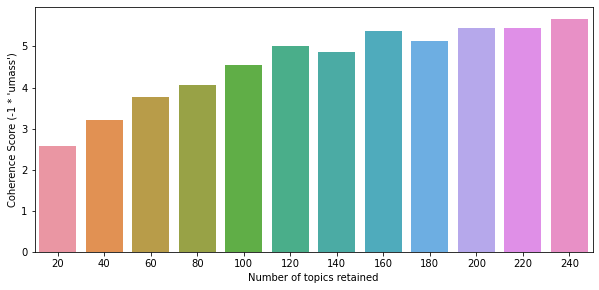

In [18]:
fig = plt.figure(figsize=(10, 4.5))
ax = fig.add_subplot(111)
sns.barplot(x=list(mf.keys()), y=[-1*score for score in mf.values()], ax=ax)
ax.set_xlabel("Number of topics retained")
ax.set_ylabel("Coherence Score (-1 * 'umass')")
plt.show()

In [ ]:
best_mdl = tp.LDAModel.load("k_200")                             # step 1
td = pd.DataFrame(                                                # step 2
    np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
    columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
)
td.info(verbose=True, null_counts=True)

In [ ]:
from rich.console import Console
from rich.table import Table

In [ ]:
# inspect the output of the LDA algorithm

# create a Rich's table to print the output of the spaCy's pipeline
console = Console()
# defin table properties
table = Table(
    show_header=True,
    header_style="cyan",
    title="[bold] [cyan] Word to topic probabilities (top 10 words)[/cyan]",
    width=150,
)
# add columns
table.add_column("Topic", justify="center", style="cyan", width=10)
table.add_column("W 1", width=12)
table.add_column("W 2", width=12)
table.add_column("W 3", width=12)
table.add_column("W 4", width=12)
table.add_column("W 5", width=12)
table.add_column("W 6", width=12)
table.add_column("W 7", width=12)
table.add_column("W 8", width=12)
table.add_column("W 9", width=12)
table.add_column("W 10", width=12)
# add rows
for k in range(best_mdl.k):
    values = []
    for word, prob in best_mdl.get_topic_words(k):
        values.append("{}\n({})\n".format(word, str(np.round(prob, 3))))       
    table.add_row(
        str(k),
        values[0],
        values[1],
        values[2],
        values[3],
        values[4],
        values[5],
        values[6],
        values[7],
        values[8],
        values[9],
    )
# print the table
table

In [ ]:
#Creating Topic Distance Visualization 
import pyLDAvis
topic_term_dists = np.stack(                                 # step 1
    [best_mdl.get_topic_word_dist(k) for k in range(best_mdl.k)]
)
doc_topic_dists = np.stack(                                  # step 2
    [doc.get_topic_dist() for doc in best_mdl.docs]
)
doc_topic_dists /= doc_topic_dists.sum(axis=1, keepdims=True)
doc_lengths = np.array([len(doc.words) for doc in best_mdl.docs]) # step 3
vocab = list(best_mdl.used_vocabs)                                # step 4
term_frequency = best_mdl.used_vocab_freq     

In [ ]:
prepared_data = pyLDAvis.prepare(
        topic_term_dists, 
        doc_topic_dists, 
        doc_lengths, 
        vocab, 
        term_frequency,
        start_index=0, 
        sort_topics=False 
    )

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:

pyLDAvis.save_html(prepared_data, 'ldavis.html')

In [ ]:
# combine the LDA result with sentiment analysis
scaler = MinMaxScaler()
# Scale values by row
td_scaled = pd.DataFrame(scaler.fit_transform(td.T).T, columns=td.columns)
# merge with sentiment and original dataframe
s0 = s.reset_index()
s0.rename(columns = {'index':'review_id'}, inplace = True) # get review_id
s0 = pd.merge(s0.iloc[:, 0], td_scaled, left_index = True, right_index = True) # add review_id
s0 = pd.merge(train, s0, how = 'right', left_index = True, right_on='review_id') #with sentiment variables

In [ ]:
# split training and test set
X, y = s0.iloc[:,2:].values, s0.loc[:, "helpfulness_cat"].values
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [ ]:
# scale variables
def scale_variables(x):
    df = pd.DataFrame(x)
    df = scaler.fit_transform(df)
    return df

In [ ]:
X_train = scale_variables(X_train)
X_test = scale_variables(X_test)

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_c = RidgeClassifier(alpha=0.1, random_state=0, fit_intercept=False)
ridge_c.fit(X_train, y_train)
ridge_c.score(X_test, y_test)
y_pred = ridge_c.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
# build naive bayesian classifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

In [ ]:
# making predictions on the testing set
y_pred = mnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import keras_tuner as kt

In [ ]:
# split training and test set
X, y = s0.iloc[:,2:].values, s0.loc[:, "helpfulness_cat"].values
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)
# split train dataset into train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
X_train = scale_variables(X_train)
X_valid = scale_variables(X_valid)
X_test = scale_variables(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

In [ ]:
# set up a basic deep learning model
#    Sequential model: one input and one output layer
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train.shape[1:]),
    #tf.keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Acc'])
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

In [ ]:
plt.plot(history.history['loss'],label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['Acc'],label = "training acc")
plt.plot(history.history['val_Acc'], label = "validation acc")
plt.legend()
plt.show()

### pytorch text classification

In [ ]:
# load libraries
import torch
from torch.utils.data import DataLoader
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
# convert train data to list with labels
train_data = []
for i in range(len(train)):
    train_data.append((int(train['helpfulness_cat'][i]), train['imdb_user_review'][i]))

In [ ]:
# check null values in train_data
null_count = 0
for i in range(len(train_data)):
    if train_data[i][0] == 'nan':
        null_count += 1
print("Null values in train_data:", null_count)


Null values in train_data: 0


In [ ]:
# convert train_data to iterator
train_data_iter = iter(train_data)

In [ ]:
# tokenization
tokenizer = get_tokenizer('basic_english')
# apply the tokenizer
# --+ custom function
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)
# --+ deploy the tokenizer to get the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_data_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
# tokenize Yelp reviews 
text_pipeline = lambda x: vocab(tokenizer(x))
# encode review labels
label_pipeline = lambda x: int(x)

In [ ]:
train_data_iter = iter(train_data)

In [ ]:
# custom function
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)
# deploy the function
dataloader = DataLoader(train_data_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

In [ ]:
train_data_iter = iter(train_data)

In [ ]:
# %%
# model creation

# load libraries
from torch import nn
# the class associated with the module
class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [ ]:
# %%
# model set up
train_data_iter = iter(train_data)
# examples
# classes
num_class = len(set([label for (label, text) in train_data_iter]))
# vocabulary size
vocab_size = len(vocab)
# ebedding bag size
emsize = 64
# model instantiation
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [ ]:
train_data_iter = iter(train_data)

In [ ]:
# load library 
import time
# custom function for training 
def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

In [ ]:
# custom function for evaluation
def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [ ]:
train_data_iter = iter(train_data)

In [ ]:
# load libraries 
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# hyperparameters for the search
# --+ epoch
EPOCHS = 10 
# --+ learning rate
LR = 5  
# --+ batch size for training
BATCH_SIZE = 64 
# optimization
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
# data handling
train_dataset = to_map_style_dataset(train_data_iter)
#test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
#test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             #shuffle=True, collate_fn=collate_batch)

In [ ]:
# check the train_dataloader
for batch in train_dataloader:
    print(batch)
    break

(tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]), tensor([  95,    6,   33,  ..., 1047,  152,    1]), tensor([    0,   176,   341,   355,   505,   550,   652,   819,  2021,  2685,
         2801,  3010,  3730,  3859,  4011,  4208,  4322,  4449,  4606,  4634,
         4990,  5317,  5911,  5936,  6703,  6815,  6887,  7031,  7459,  7711,
         7918,  8073,  8169,  8206,  8309,  8433,  8607,  8751,  8955,  9008,
         9105,  9241,  9382,  9549,  9561,  9577, 10450, 10863, 11005, 11034,
        11205, 11399, 11972, 12010, 12176, 12805, 12920, 12946, 13013, 13065,
        13109, 13231, 13382, 13627]))


In [ ]:
# logging
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)


-----------------------------------------------------------
| end of epoch   1 | time:  2.34s | valid accuracy    0.768 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   2 | time:  2.29s | valid accuracy    0.768 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   3 | time:  2.33s | valid accuracy    0.755 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   4 | time:  2.31s | valid accuracy    0.770 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   5 | time:  2.37s | valid accuracy    0.764 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   6 | time:  2.39s |

In [ ]:
# test on random unseen review

# labels
review_label = {1: "helpful",
                0: "unhelpful"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "yes"

model = model.to("cpu")

print("This is a %s movie review" %review_label[predict(ex_text_str, text_pipeline)])

This is a helpful movie review


### bert tokenization

In [ ]:
# !pip install pytorch-nlp
# !pip install pytorch-pretrained-bert

     |████████████████████████████████| 90 kB 4.1 MB/s eta 0:00:011


In [ ]:
# import libraries
from pytorch_pretrained_bert import BertModel
from pytorch_pretrained_bert import BertTokenizer
from torch import nn
from keras_preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_

In [22]:
# split data set
X_train = train.drop(['helpfulness_cat'], axis=1)
y_train = train.loc[:, 'helpfulness_cat']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# combine x train and y trian in to new pd dataframe
train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_valid, y_valid], axis=1)

# reformat the data into pytorch dataset
train_data = train_df.to_dict(orient='records')
test_data = valid_df.to_dict(orient='records')

train_texts, train_labels = list(zip(*map(lambda d: (d['imdb_user_review'], d['helpfulness_cat']), train_data)))
test_texts, test_labels = list(zip(*map(lambda d: (d['imdb_user_review'], d['helpfulness_cat']), test_data)))

len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(8604, 8604, 2151, 2151)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

100%|██████████| 231508/231508 [00:00<00:00, 659891.34B/s]


In [ ]:
# prepare token embedding
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], test_texts))

In [ ]:
len(train_tokens), len(test_tokens)

(8604, 2151)

In [ ]:
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

In [ ]:
train_y = np.array(train_labels)
test_y = np.array(test_labels)

In [ ]:
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)

((8604,), (2151,), 0.7629009762900977, 0.7670850767085077)

In [ ]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
baseline_model = make_pipeline(CountVectorizer(ngram_range=(1,3)), LogisticRegression()).fit(train_texts, train_labels)

/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
baseline_predicted = baseline_model.predict(test_texts)

In [ ]:
print(classification_report(test_labels, baseline_predicted))

              precision    recall  f1-score   support

         0.0       0.60      0.27      0.37       501
         1.0       0.81      0.94      0.87      1650

    accuracy                           0.79      2151
   macro avg       0.70      0.61      0.62      2151
weighted avg       0.76      0.79      0.76      2151

